 #  EDA on Vehicle Insurance Customer Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Add the column names to both datasets:

In [2]:
import pandas as pd
df1 = pd.read_csv("customer_details.csv")

In [3]:
df1

,0,1,2,3,4,5,6,7
0,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes
1,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,No
2,3.0,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes
3,4.0,Male,21.0,1.0,11.0,1.0,< 1 Year,No
4,5.0,Female,29.0,1.0,41.0,1.0,< 1 Year,No
...,...,...,...,...,...,...,...,...
381104,381105.0,Male,74.0,1.0,26.0,1.0,1-2 Year,No
381105,381106.0,Male,30.0,1.0,37.0,1.0,< 1 Year,No
381106,381107.0,Male,21.0,1.0,30.0,1.0,< 1 Year,No
381107,381108.0,Female,68.0,1.0,14.0,0.0,> 2 Years,Yes


In [4]:
import pandas as pd
df2 = pd.read_csv("customer_policy_details.csv")

In [5]:
df2

,0,1,2,3,4
0,1.0,40454.0,26.0,217.0,1.0
1,2.0,33536.0,26.0,183.0,0.0
2,3.0,38294.0,26.0,27.0,1.0
3,4.0,28619.0,152.0,203.0,0.0
4,5.0,27496.0,152.0,39.0,0.0
...,...,...,...,...,...
381104,381105.0,30170.0,26.0,88.0,0.0
381105,381106.0,40016.0,152.0,131.0,0.0
381106,381107.0,35118.0,160.0,161.0,0.0
381107,381108.0,44617.0,124.0,74.0,0.0


#  i. Column Name for customer details table

In [6]:
df1.columns= ['customer_id','Gender','Age','Driving license present','region code','previously insured','vehicle age','vehicle damage']

In [7]:
df1

,customer_id,Gender,Age,Driving license present,region code,previously insured,vehicle age,vehicle damage
0,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes
1,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,No
2,3.0,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes
3,4.0,Male,21.0,1.0,11.0,1.0,< 1 Year,No
4,5.0,Female,29.0,1.0,41.0,1.0,< 1 Year,No
...,...,...,...,...,...,...,...,...
381104,381105.0,Male,74.0,1.0,26.0,1.0,1-2 Year,No
381105,381106.0,Male,30.0,1.0,37.0,1.0,< 1 Year,No
381106,381107.0,Male,21.0,1.0,30.0,1.0,< 1 Year,No
381107,381108.0,Female,68.0,1.0,14.0,0.0,> 2 Years,Yes


# ii. Column Name for customer_policy table:

In [8]:
df2.columns = ['customer_id','annual premium (in Rs)','sales channel code','vintage','response']

In [9]:
df2

,customer_id,annual premium (in Rs),sales channel code,vintage,response
0,1.0,40454.0,26.0,217.0,1.0
1,2.0,33536.0,26.0,183.0,0.0
2,3.0,38294.0,26.0,27.0,1.0
3,4.0,28619.0,152.0,203.0,0.0
4,5.0,27496.0,152.0,39.0,0.0
...,...,...,...,...,...
381104,381105.0,30170.0,26.0,88.0,0.0
381105,381106.0,40016.0,152.0,131.0,0.0
381106,381107.0,35118.0,160.0,161.0,0.0
381107,381108.0,44617.0,124.0,74.0,0.0


# 2. Checking and Cleaning Data Quality

## Generate a summary of count of all the null values column wise

In [10]:
df1_null = df1.isnull()
for i in df1_null.columns.values.tolist():
    print(i)
    print("-"*20)
    print(df1_null[i].value_counts())
    print("-"*20)

customer_id
--------------------
False    380723
True        386
Name: customer_id, dtype: int64
--------------------
Gender
--------------------
False    380741
True        368
Name: Gender, dtype: int64
--------------------
Age
--------------------
False    380741
True        368
Name: Age, dtype: int64
--------------------
Driving license present
--------------------
False    380716
True        393
Name: Driving license present, dtype: int64
--------------------
region code
--------------------
False    380717
True        392
Name: region code, dtype: int64
--------------------
previously insured
--------------------
False    380728
True        381
Name: previously insured, dtype: int64
--------------------
vehicle age
--------------------
False    380728
True        381
Name: vehicle age, dtype: int64
--------------------
vehicle damage
--------------------
False    380702
True        407
Name: vehicle damage, dtype: int64
--------------------


In [11]:
df2_null = df2.isnull()
for i in df2_null.columns.values.tolist():
    print(i)
    print("-"*20)
    print(df2_null[i].value_counts())
    print("-"*20)

customer_id
--------------------
False    380722
True        387
Name: customer_id, dtype: int64
--------------------
annual premium (in Rs)
--------------------
False    380763
True        346
Name: annual premium (in Rs), dtype: int64
--------------------
sales channel code
--------------------
False    380709
True        400
Name: sales channel code, dtype: int64
--------------------
vintage
--------------------
False    380721
True        388
Name: vintage, dtype: int64
--------------------
response
--------------------
False    380748
True        361
Name: response, dtype: int64
--------------------


## Drop Null values for customer_id because central tendencies for id’s is not feasible

In [12]:
df1.dropna(subset=['customer_id'],inplace=True)

In [13]:
print(' customer details table n Null values in customer_id column after dropping  null values :',df1['customer_id'].isna().sum())

 customer details table n Null values in customer_id column after dropping  null values : 0


In [14]:
df2.dropna(subset=['customer_id'],inplace=True)

In [15]:
print(' customer details table n Null values in customer_id column after dropping  null values :',df2['customer_id'].isna().sum())

 customer details table n Null values in customer_id column after dropping  null values : 0


## Replace all null values for numeric columns by mean

In [16]:
df1.head()

,customer_id,Gender,Age,Driving license present,region code,previously insured,vehicle age,vehicle damage
0,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes
1,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,No
2,3.0,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes
3,4.0,Male,21.0,1.0,11.0,1.0,< 1 Year,No
4,5.0,Female,29.0,1.0,41.0,1.0,< 1 Year,No


In [17]:
df1['Age'].fillna(df1['Age'].mean(),inplace=True)

In [18]:
print(' Null values in Age column after dropping  null values :',df1['Age'].isna().sum())

 Null values in Age column after dropping  null values : 0


In [19]:
df1['region code'].fillna(df1['region code'].mean(),inplace=True)

In [20]:
print(' Null values in region code column after dropping  null values :',df1['region code'].isna().sum())

 Null values in region code column after dropping  null values : 0


In [21]:
df2.head()

,customer_id,annual premium (in Rs),sales channel code,vintage,response
0,1.0,40454.0,26.0,217.0,1.0
1,2.0,33536.0,26.0,183.0,0.0
2,3.0,38294.0,26.0,27.0,1.0
3,4.0,28619.0,152.0,203.0,0.0
4,5.0,27496.0,152.0,39.0,0.0


In [22]:
df2['annual premium (in Rs)'].fillna(df2['annual premium (in Rs)'].mean(),inplace = True)

In [23]:
print('Null Values in annual premium (in Rs) column after dropping null values', df2['annual premium (in Rs)'].isna().sum())

Null Values in annual premium (in Rs) column after dropping null values 0


In [24]:
df2['sales channel code'].fillna(df2['sales channel code'].mean(),inplace = True)

In [25]:
print('Null Values in sales channel code column after dropping null values', df2['sales channel code'].isna().sum())

Null Values in sales channel code column after dropping null values 0


In [26]:
df2['vintage'].fillna(df2['vintage'].mean(),inplace = True)

In [27]:
print('Null Values in sales vintage column after dropping null values', df2['vintage'].isna().sum())

Null Values in sales vintage column after dropping null values 0


## Replace all null values for Categorical value by mode.

In [28]:
df1['Driving license present'].fillna(df1['Driving license present'].mode()[0],inplace=True)

In [29]:
print(' Null values in Driving license present column after dropping  null values :',df1['Driving license present'].isna().sum())

 Null values in Driving license present column after dropping  null values : 0


In [30]:
df1['previously insured'].fillna(df1['previously insured'].mode()[0],inplace=True)

In [31]:
print(' Null values in previously insured column after dropping  null values :',df1['previously insured'].isna().sum())

 Null values in previously insured column after dropping  null values : 0


In [32]:
df2['vintage'].fillna(df2['vintage'].mode()[0],inplace=True)

In [33]:
print(' Null values in previously insured column after dropping  null values :',df2['vintage'].isna().sum())

 Null values in previously insured column after dropping  null values : 0


 # ii. Outliers

# Generate a summary of count of all the outliers column wise

In [34]:
df1.describe()

,customer_id,Age,Driving license present,region code,previously insured
count,380723.000000,380723.000000,380723.000000,380723.000000,380723.000000
mean,190548.776244,38.822788,0.997870,26.389436,0.457800
std,110016.805160,15.504826,0.046105,13.223671,0.498217
min,1.000000,20.000000,0.000000,0.000000,0.000000
25%,95269.500000,25.000000,1.000000,15.000000,0.000000
50%,190543.000000,36.000000,1.000000,28.000000,0.000000
75%,285822.500000,49.000000,1.000000,35.000000,1.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000


In [35]:
Q1=df1.describe().loc["25%","Age"]
Q3=df1.describe().loc["75%","Age"]

In [36]:
IQR=Q3-Q1

In [37]:
print('Customer details table')

Customer details table


In [38]:
print('Outliers present in age column are :',df1.loc[df1["Age"]<(Q1-IQR*1.5),"Age"].count())

Outliers present in age column are : 0


In [39]:
print('Outliers present in age column are :',df1.loc[df1["Age"]>(Q3+IQR*1.5),"Age"].count())

Outliers present in age column are : 0


In [40]:
Q1=df1.describe().loc["25%","region code"]
Q3=df1.describe().loc["75%","region code"]

In [41]:
IQR=Q3-Q1

In [42]:
print('Customer details table')

Customer details table


In [43]:
print('Outliers present in region code column are :',df1.loc[df1["region code"]<(Q1-IQR*1.5),"region code"].count())

Outliers present in region code column are : 0


In [44]:
print('Outliers present in region code column are :',df1.loc[df1["region code"]>(Q3+IQR*1.5),"region code"].count())
 

Outliers present in region code column are : 0


In [45]:
df2.describe()

,customer_id,annual premium (in Rs),sales channel code,vintage,response
count,380722.000000,380722.000000,380722.000000,380722.000000,380361.000000
mean,190547.491663,30563.999774,112.036687,154.347192,0.122526
std,110013.824148,17190.147550,54.177046,83.628096,0.327892
min,1.000000,2630.000000,1.000000,10.000000,0.000000
25%,95276.250000,24416.000000,29.000000,82.000000,0.000000
50%,190536.500000,31656.000000,131.000000,154.000000,0.000000
75%,285818.750000,39391.750000,152.000000,227.000000,0.000000
max,381109.000000,540165.000000,163.000000,299.000000,1.000000


In [46]:
Q1=df2.describe().loc["25%","annual premium (in Rs)"]
Q3=df2.describe().loc["75%","annual premium (in Rs)"]

In [47]:
IQR=Q3-Q1

In [48]:
print('Customer-policy-details table')

Customer-policy-details table


In [49]:
print('Outliers present in annual premium (in Rs)  column are :',df2.loc[df2["annual premium (in Rs)"]<(Q1-IQR*1.5),"annual premium (in Rs)"].count())

Outliers present in annual premium (in Rs)  column are : 0


In [50]:
print('Outliers present in annual premium (in Rs)  column are :',df2.loc[df2["annual premium (in Rs)"]>(Q3+IQR*1.5),"annual premium (in Rs)"].count())

Outliers present in annual premium (in Rs)  column are : 10332


In [51]:
Q1=df2.describe().loc["25%","vintage"]

In [52]:
Q3=df2.describe().loc["75%","vintage"]

In [53]:
IQR=Q3-Q1

In [54]:
print('Customer-policy-details table')
print('Outliers present in vintage column are :',df2.loc[df2["vintage"]<(Q1-IQR*1.5),"vintage"].count())
print('Outliers present in vintage column are :',df2.loc[df2["vintage"]>(Q3+IQR*1.5),"vintage"].count())

Customer-policy-details table
Outliers present in vintage column are : 0
Outliers present in vintage column are : 0


 # Replacing the outliers with mean values

In [55]:
mean=df2["annual premium (in Rs)"].mean()

In [56]:
print('Mean of annual premium (in Rs) column values: ',mean)

Mean of annual premium (in Rs) column values:  30563.999773909116


In [57]:
def replace_outlier(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    iqr=q3-q1
    upper=df[~(df>(q3+1.5*iqr))].max()
    lower=df[~(df<(q1-1.5*iqr))].min()
    df=np.where(df>upper,df.mean(),np.where(df<lower,df.mean(),df))
    return df

In [82]:
df2["annual premium (in Rs)"] = replace_outlier(df2["annual premium (in Rs)"])

In [83]:
df2['annual premium (in Rs)']

0         40454.0
1         33536.0
2         38294.0
3         28619.0
4         27496.0
           ...   
381104    30170.0
381105    40016.0
381106    35118.0
381107    44617.0
381108    41777.0
Name: annual premium (in Rs), Length: 380722, dtype: float64

## iii. White spaces

In [60]:
'''

df1["Gender"]=df1["Gender"].str.strip()
df1["vehicle age"]=df1["vehicle age"].str.strip()
df1["vehicle damage"]=df1["vehicle damage"].str.strip()
'''

'\n\ndf1["Gender"]=df1["Gender"].str.strip()\ndf1["vehicle age"]=df1["vehicle age"].str.strip()\ndf1["vehicle damage"]=df1["vehicle damage"].str.strip()\n'

In [61]:
'''
df1["Gender"]=df1["Gender"].str.lower()
df1["vehicle age"]=df1["vehicle age"].str.lower()
df1["vehicle damage"]=df1["vehicle damage"].str.lower()
'''

'\ndf1["Gender"]=df1["Gender"].str.lower()\ndf1["vehicle age"]=df1["vehicle age"].str.lower()\ndf1["vehicle damage"]=df1["vehicle damage"].str.lower()\n'

In [62]:
'''
dummies_gender=pd.get_dummies(df1["Gender"])
dummies_vehicle_age=pd.get_dummies(df1["vehicle age"])
dummies_vehicle_damage=pd.get_dummies(df1["vehicle damage"])
dummies_dlp=pd.get_dummies(df1["Driving license present"])
dummies_pre=pd.get_dummies(df1["previously insured"])
'''

'\ndummies_gender=pd.get_dummies(df1["Gender"])\ndummies_vehicle_age=pd.get_dummies(df1["vehicle age"])\ndummies_vehicle_damage=pd.get_dummies(df1["vehicle damage"])\ndummies_dlp=pd.get_dummies(df1["Driving license present"])\ndummies_pre=pd.get_dummies(df1["previously insured"])\n'

In [63]:
print(df1.duplicated().sum())

0


In [64]:
print(df2.duplicated().sum())

0


In [65]:
df1.drop_duplicates(inplace=True)

In [66]:
df2.drop_duplicates(inplace=True)

# 3. Create a Master table for future use. Join the customer table and customer_policy table to get a master table using customer_id in both tables.

In [67]:
df1.head()

,customer_id,Gender,Age,Driving license present,region code,previously insured,vehicle age,vehicle damage
0,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes
1,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,No
2,3.0,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes
3,4.0,Male,21.0,1.0,11.0,1.0,< 1 Year,No
4,5.0,Female,29.0,1.0,41.0,1.0,< 1 Year,No


In [68]:
df2.head()

,customer_id,annual premium (in Rs),sales channel code,vintage,response
0,1.0,40454.0,26.0,217.0,1.0
1,2.0,33536.0,26.0,183.0,0.0
2,3.0,38294.0,26.0,27.0,1.0
3,4.0,28619.0,152.0,203.0,0.0
4,5.0,27496.0,152.0,39.0,0.0


In [69]:
mas_data=pd.merge(df1,df2,on='customer_id')

In [70]:
mas_data

,customer_id,Gender,Age,Driving license present,region code,previously insured,vehicle age,vehicle damage,annual premium (in Rs),sales channel code,vintage,response
0,1.0,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes,40454.0,26.0,217.0,1.0
1,2.0,Male,76.0,1.0,3.0,0.0,1-2 Year,No,33536.0,26.0,183.0,0.0
2,3.0,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes,38294.0,26.0,27.0,1.0
3,4.0,Male,21.0,1.0,11.0,1.0,< 1 Year,No,28619.0,152.0,203.0,0.0
4,5.0,Female,29.0,1.0,41.0,1.0,< 1 Year,No,27496.0,152.0,39.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
380331,381105.0,Male,74.0,1.0,26.0,1.0,1-2 Year,No,30170.0,26.0,88.0,0.0
380332,381106.0,Male,30.0,1.0,37.0,1.0,< 1 Year,No,40016.0,152.0,131.0,0.0
380333,381107.0,Male,21.0,1.0,30.0,1.0,< 1 Year,No,35118.0,160.0,161.0,0.0
380334,381108.0,Female,68.0,1.0,14.0,0.0,> 2 Years,Yes,44617.0,124.0,74.0,0.0


 ## 4. Company needs some important information from the master table to make decisions for future growth.They needs following information:

#  i. Gender wise average annual premium

In [71]:
l1=mas_data.groupby(["Gender"])["annual premium (in Rs)"].mean()

In [72]:
l1

Gender
Female    29273.474247
Male      29323.022594
Name: annual premium (in Rs), dtype: float64

 # ii. Age wise average annual premium

In [73]:
agwise=mas_data.groupby(["Age"])["annual premium (in Rs)"].mean()

In [74]:
agwise

Age
20.0    26342.073517
21.0    29751.791916
22.0    29946.848634
23.0    29838.344763
24.0    30125.557096
            ...     
81.0    29287.910702
82.0    36480.586199
83.0    28995.818172
84.0    35440.818182
85.0    26637.454525
Name: annual premium (in Rs), Length: 67, dtype: float64

 # iii. Is your data balanced between the genders?

In [75]:
mas_data.groupby('Gender').count()

,customer_id,Age,Driving license present,region code,previously insured,vehicle age,vehicle damage,annual premium (in Rs),sales channel code,vintage,response
Gender,,,,,,,,,,,
Female,174485,174485,174485,174485,174485,174309,174300,174485,174485,174485,174329
Male,205484,205484,205484,205484,205484,205279,205266,205484,205484,205484,205281


 # iv. Vehicle age wise average annual premium

In [76]:
vwiseavp=mas_data.groupby(["vehicle age"])["annual premium (in Rs)"].mean()

In [77]:
vwiseavp

vehicle age
1-2 Year     29099.066738
< 1 Year     29188.150594
> 2 Years    32943.540830
Name: annual premium (in Rs), dtype: float64

<Axes: xlabel='vehicle age'>

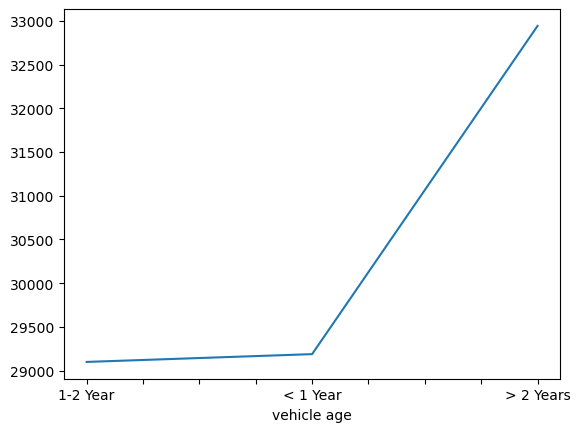

In [78]:
vwiseavp.plot()

# 5. Is there any relation between Person Age and annual premium?

In [79]:
n=mas_data['Age'].corr(mas_data["annual premium (in Rs)"])

In [80]:
n

0.050657589286171825

In [81]:
mas_data[['Age','annual premium (in Rs)']].corr()

,Age,annual premium (in Rs)
Age,1.000000,0.050658
annual premium (in Rs),0.050658,1.000000
